In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
theta = np.linspace(0, 1, 11)
print(theta)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [4]:
unif_distr_pdf = stats.uniform.pdf(theta) 
unif_distr_pdf = unif_distr_pdf / np.sum(unif_distr_pdf)
unif_distr_pdf

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

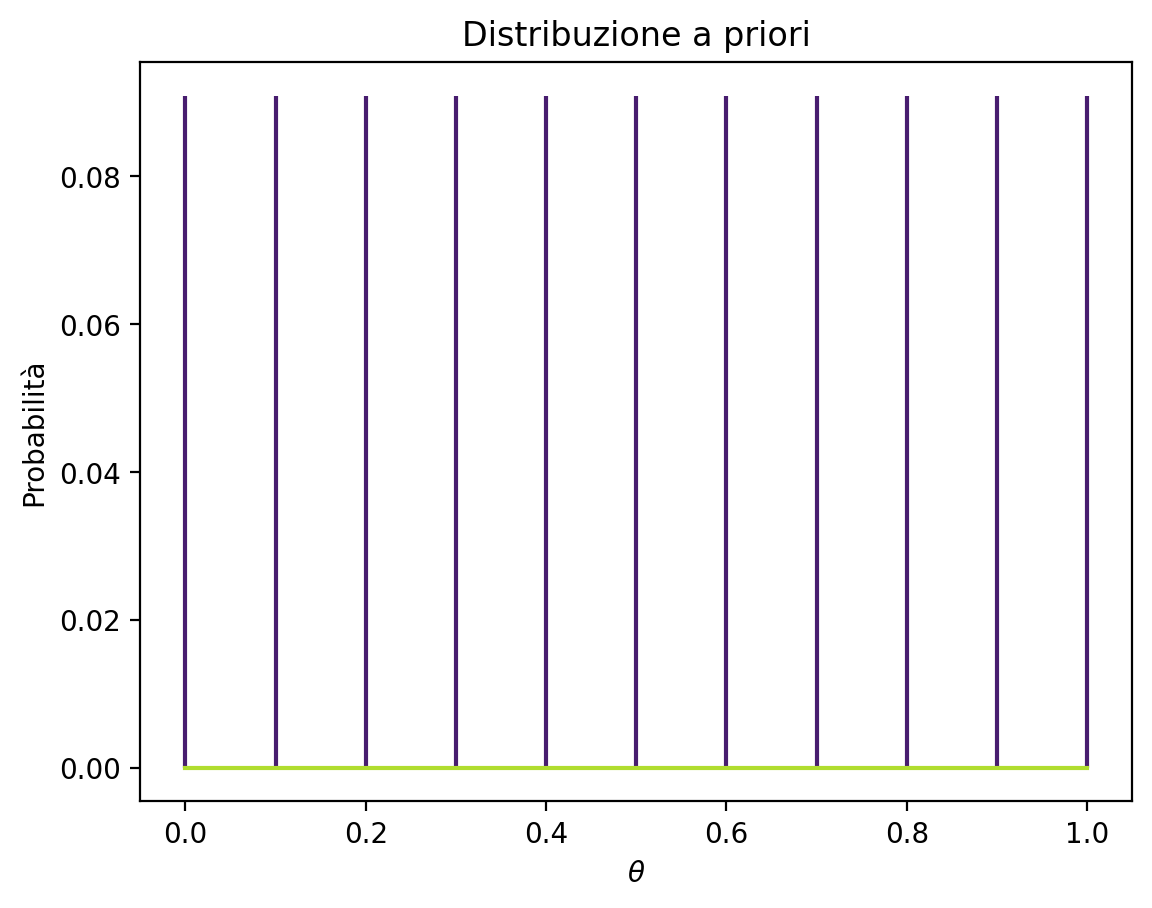

In [5]:
plt.stem(theta, unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

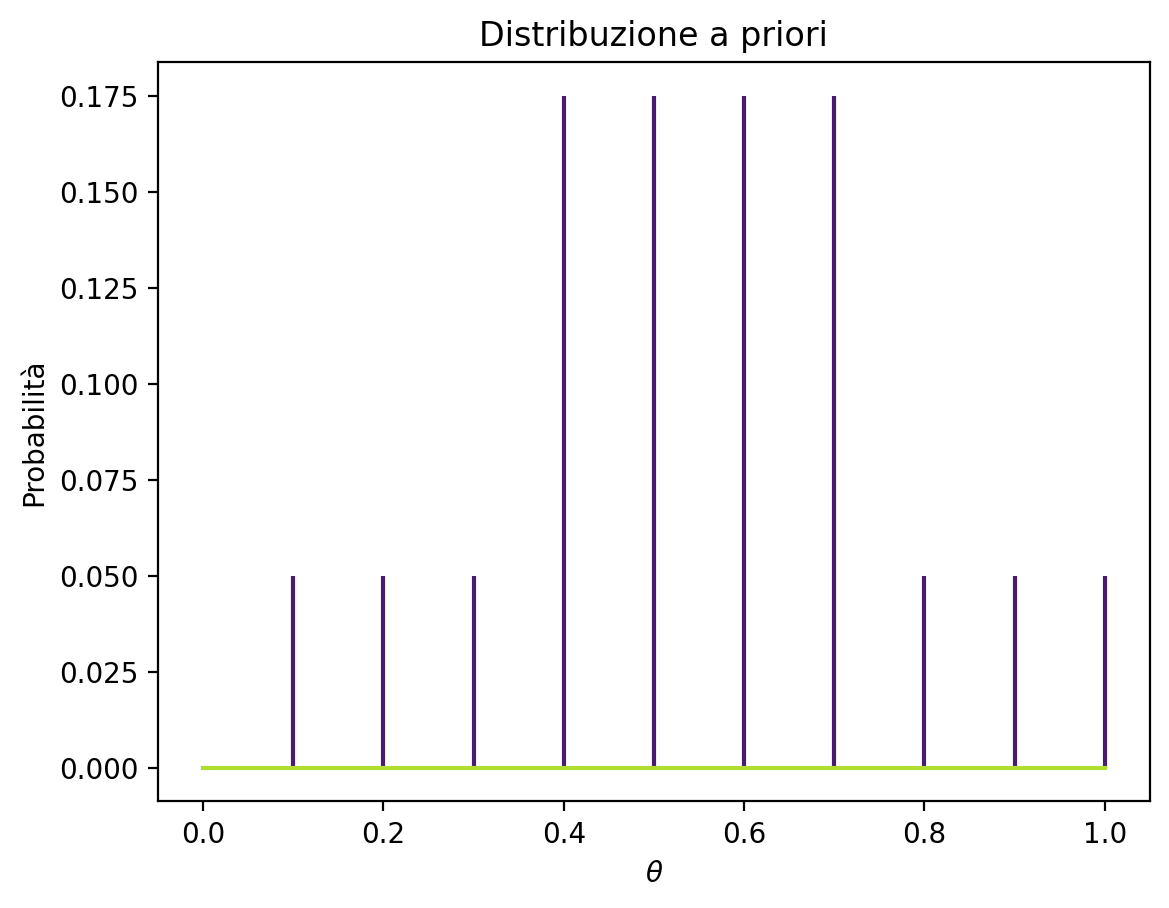

In [6]:
not_unif_distr_pdf = [0, 0.05, 0.05, 0.05, 0.175, 0.175, 0.175, 0.175, 0.05, 0.05, 0.05]
plt.stem(theta, not_unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

In [7]:
lk = stats.binom.pmf(12, 20, theta)
lk = lk / np.sum(lk)
lk

array([0.00000000e+00, 1.13872974e-07, 1.81785999e-04, 8.10438314e-03,
       7.45436212e-02, 2.52278752e-01, 3.77377083e-01, 2.40229925e-01,
       4.65372158e-02, 7.47120582e-04, 0.00000000e+00])

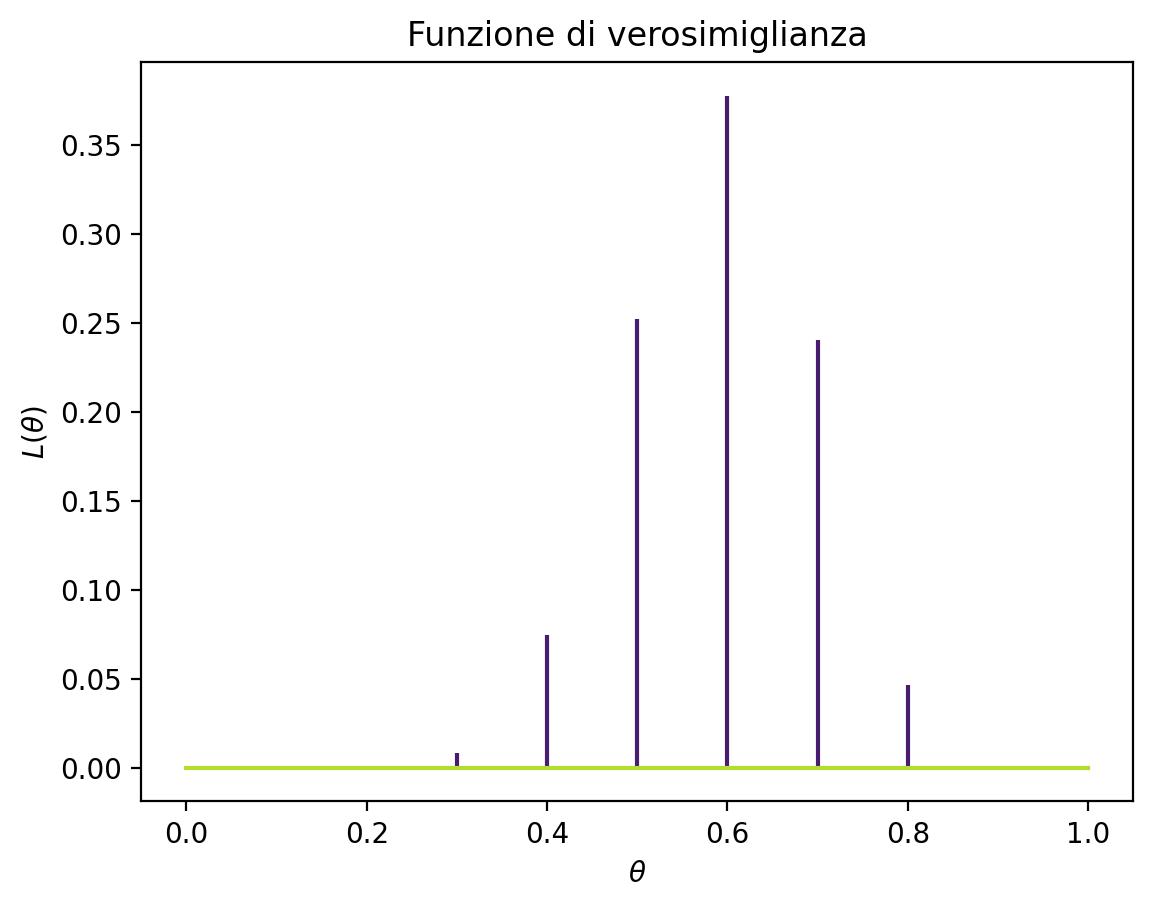

In [8]:
plt.stem(theta, lk, markerfmt=" ")
plt.title("Funzione di verosimiglianza")
plt.xlabel("$\\theta$")
plt.ylabel("$L(\\theta)$");

In [9]:
not_unif_distr_pdf * lk

array([0.00000000e+00, 5.69364870e-09, 9.08929995e-06, 4.05219157e-04,
       1.30451337e-02, 4.41487816e-02, 6.60409894e-02, 4.20402368e-02,
       2.32686079e-03, 3.73560291e-05, 0.00000000e+00])

In [10]:
np.sum(not_unif_distr_pdf * lk)

0.1680536725817584

In [11]:
post = (not_unif_distr_pdf * lk) / np.sum(not_unif_distr_pdf * lk)
print(post)

[0.00000000e+00 3.38799421e-08 5.40856966e-05 2.41124845e-03
 7.76248059e-02 2.62706437e-01 3.92975580e-01 2.50159584e-01
 1.38459383e-02 2.22286300e-04 0.00000000e+00]


In [12]:
np.sum(post)

1.0000000000000002

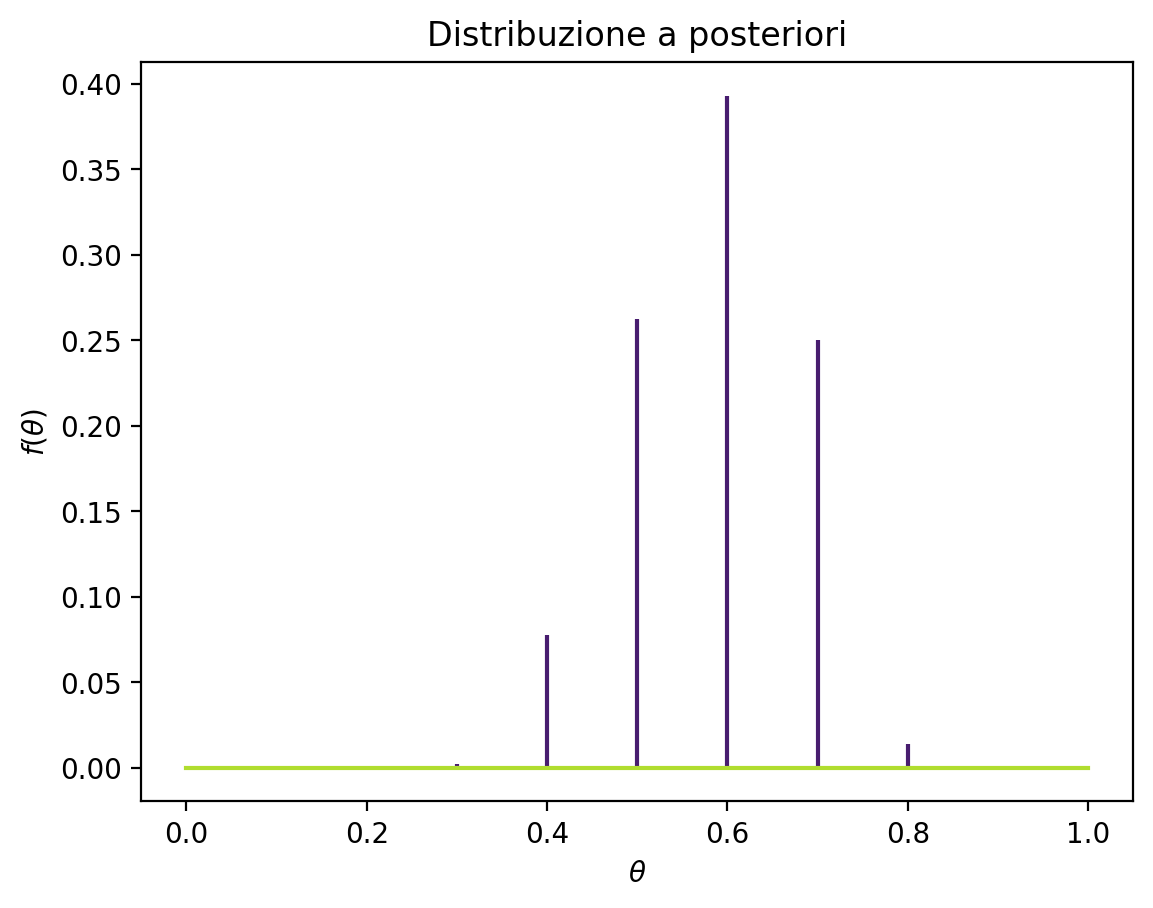

In [13]:
plt.stem(theta, post, markerfmt=" ")
plt.title("Distribuzione a posteriori")
plt.xlabel("$\\theta$")
plt.ylabel(r"$f(\theta)$");

In [14]:
np.sum(theta * post)

0.5853112012901504

In [15]:
np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2

0.00881740948606241

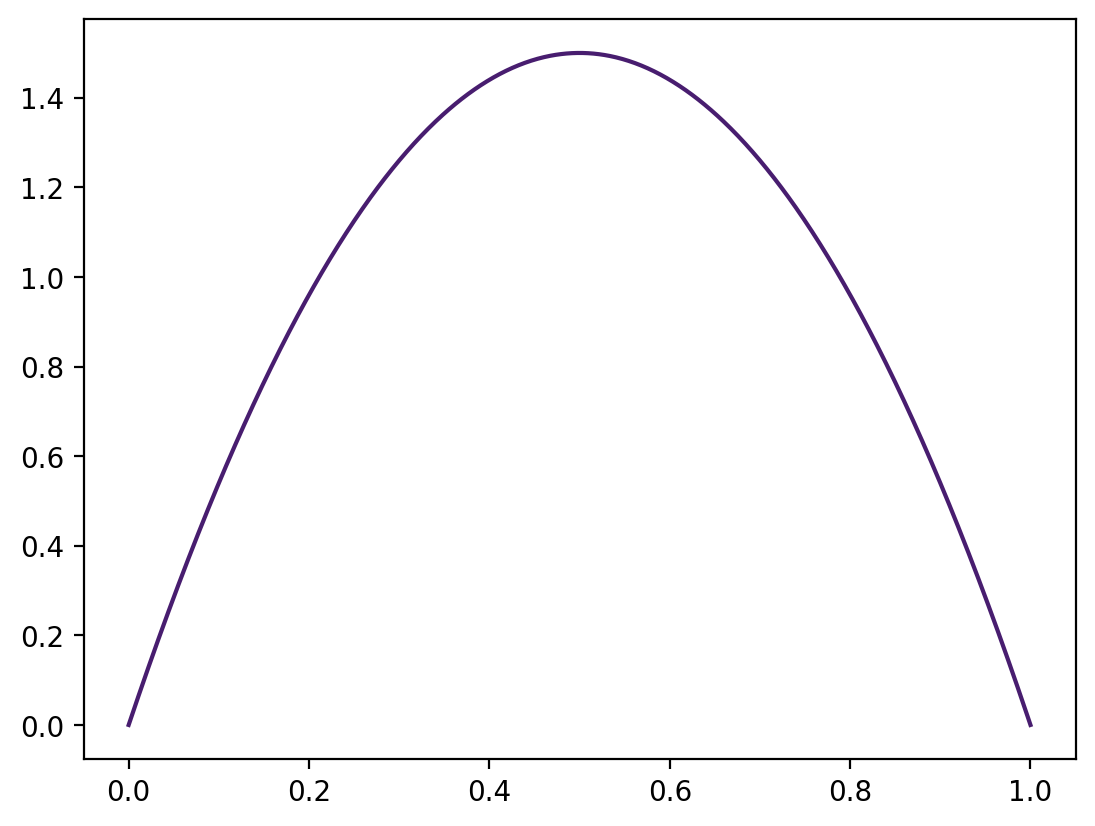

In [16]:
theta = np.linspace(0, 1, 1000)
_ = plt.plot(theta, stats.beta.pdf(theta, 2, 2), '-')

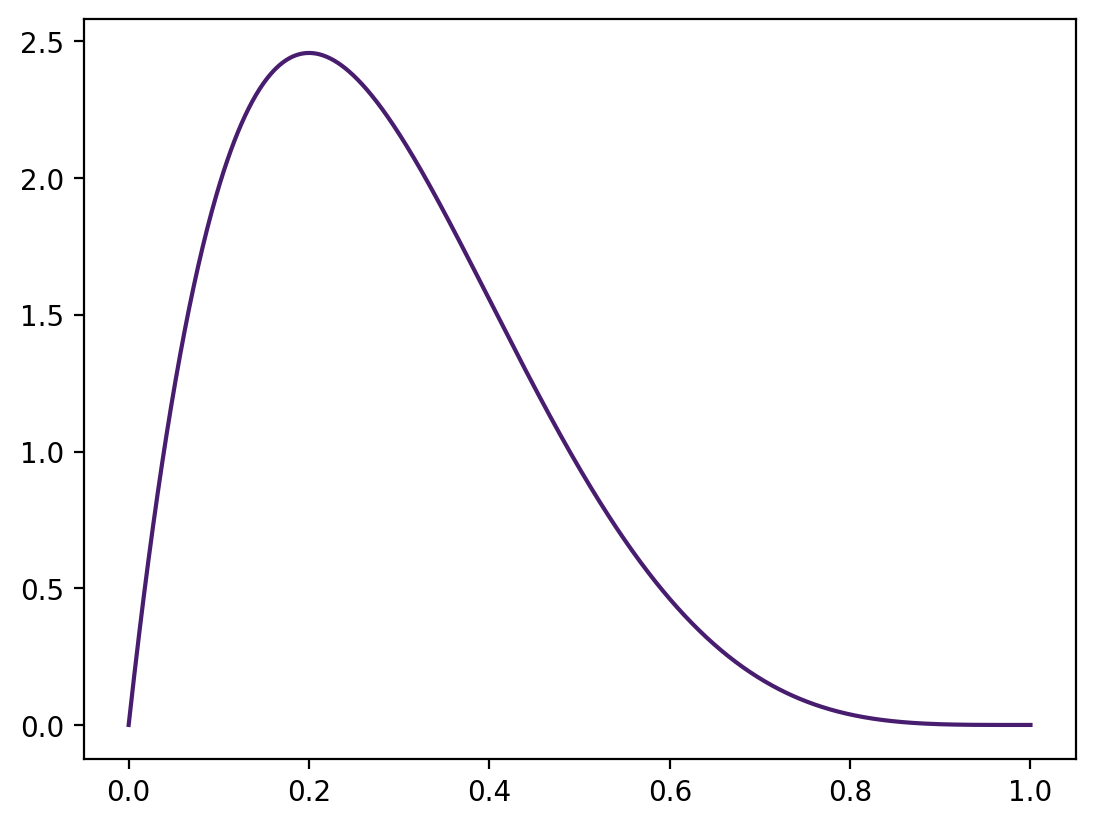

In [17]:
_ = plt.plot(theta, stats.beta.pdf(theta, 2, 5), '-')

In [18]:
prior = stats.beta.pdf(theta, 2, 5) 
prior = prior / np.sum(prior)

In [19]:
lk = stats.binom.pmf(12, 20, theta)
lk = lk / np.sum(lk)

In [20]:
post = (prior * lk) / np.sum(prior * lk)

In [21]:
np.sum(post)

1.0

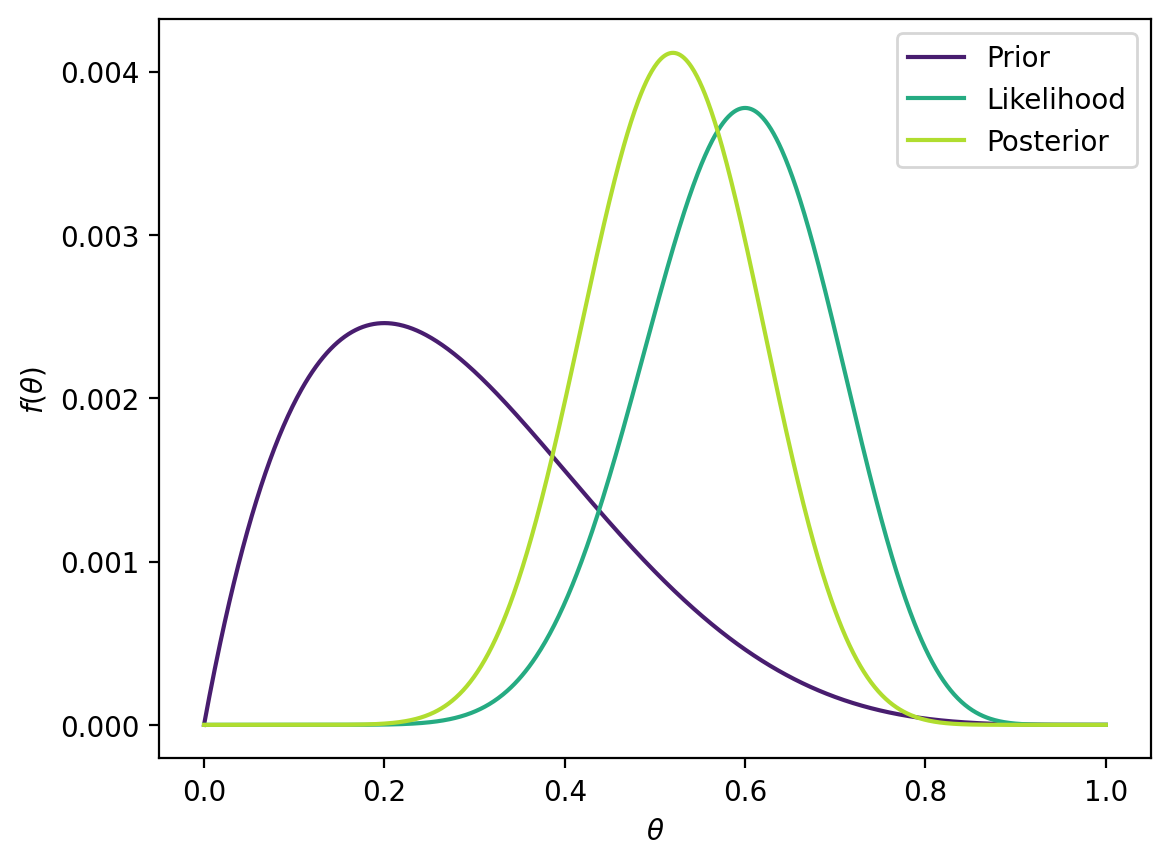

In [22]:
plt.plot(theta, prior, linestyle="solid", color="C0", label="Prior")
plt.plot(theta, lk, linestyle="solid", color="C2", label="Likelihood")
plt.plot(theta, post, linestyle="solid", color="C3", label="Posterior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
plt.legend()
plt.show();

In [23]:
# media
np.sum(theta * post)

0.5185185185185186

In [24]:
# deviazione standard
np.sqrt(np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2)

0.09442628728875496

In [25]:
samples = np.random.choice(theta, p=post, size=int(1e4), replace=True)

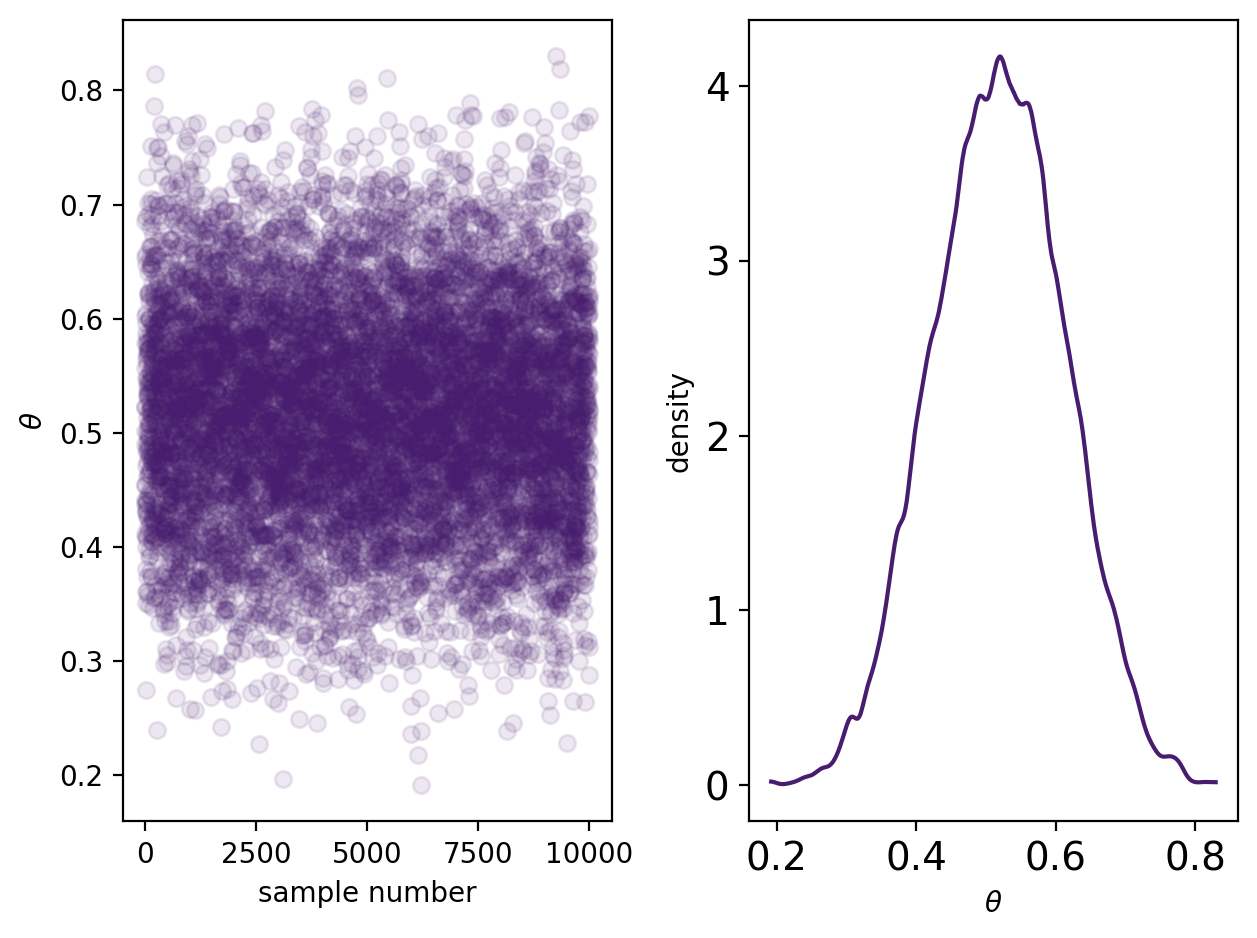

In [26]:
# First subplot: Scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(samples, 'o', alpha=0.1)
plt.xlabel("sample number")
plt.ylabel(r"$\theta$")

# Second subplot: KDE plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
az.plot_kde(samples)
plt.xlabel(r"$\theta$")
plt.ylabel("density")
plt.tight_layout()
plt.show()

In [27]:
np.mean(samples)

0.5188265265265265

In [28]:
np.std(samples)

0.09396674245890398

In [29]:
theta[post == max(post)]

array([0.51951952])

In [30]:
stats.mode(samples)[0]

array([0.56456456])

In [31]:
np.median(samples)

0.5195195195195195

In [32]:
sum(post[theta < 0.5])

0.4225091549760049

In [33]:
sum(samples < 0.5) / 1e4

0.4218

In [34]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.5721

In [35]:
np.percentile(samples, [3, 97])

array([0.34434434, 0.69369369])

In [36]:
az.hdi(samples, hdi_prob=0.94)

array([0.34134134, 0.68968969])

In [37]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

seaborn   : 0.12.2
matplotlib: 3.7.2
numpy     : 1.25.2
scipy     : 1.10.1
arviz     : 0.16.0
pandas    : 2.0.3

Watermark: 2.4.3

